dict_keys(['__header__', '__version__', '__globals__', 'zzz'])
-0.1463105018233302


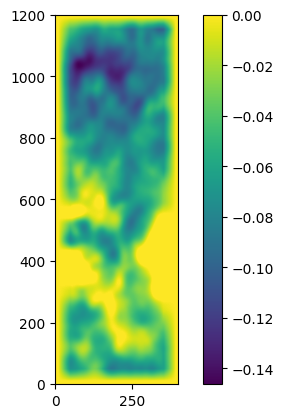

In [28]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load .mat file
data = scipy.io.loadmat("zzz.mat")

# Check available keys
print(data.keys())

# Extract variable (assuming it's named 'zzz' and is 2D)
var = data['zzz']  

print(np.min(var))

# Plot the 2D array
plt.imshow(var, cmap="viridis", origin="lower")
plt.colorbar()
plt.show()


5037.0


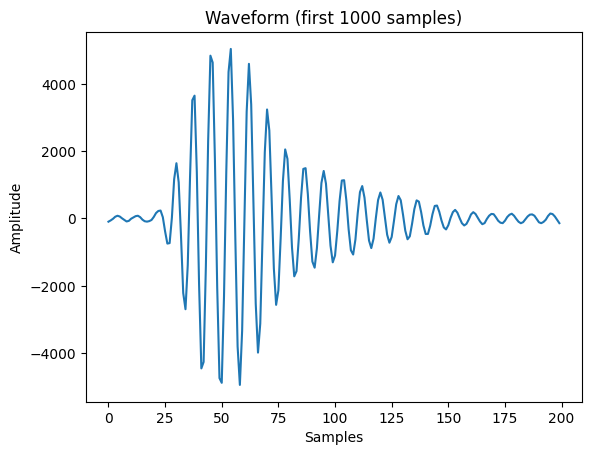

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import spectrogram

# Load data
mat_data = loadmat('filterOff_transducer_to_transducer.mat')
waveform = mat_data['data1'].squeeze()  # Replace with actual variable name
fs = 8e6  # Sampling frequency (adjust as needed)

# Normalize the waveform to float32 in the range [-1, 1]
waveform = waveform.astype(np.float64)
waveform /= np.max(np.abs(waveform))  # Normalize to [-1, 1]

waveform = waveform[300:500]



print(np.max(waveform))
plt.plot(waveform)  # Plot the first 1000 samples
plt.title("Waveform (first 1000 samples)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()



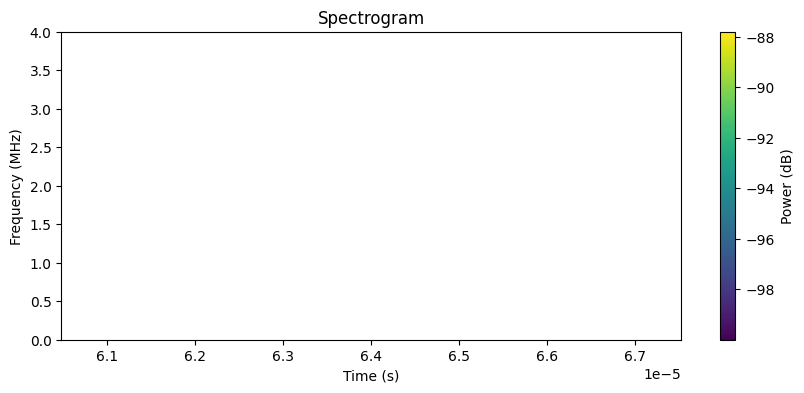

In [16]:
from scipy.signal import hann

# Apply a Hanning window to the signal (adjust as necessary)
windowed_waveform = waveform * hann(len(waveform))

# Compute the spectrogram
f, t, Sxx = spectrogram(windowed_waveform, fs=fs, nperseg=1024)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f / 1e6, 10 * np.log10(Sxx + 1e-10), shading='gouraud')
plt.ylabel('Frequency (MHz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram')
plt.colorbar(label='Power (dB)')
plt.show()


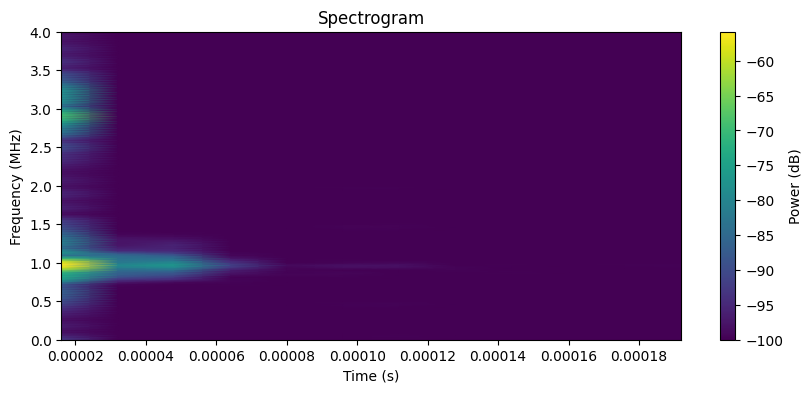

In [17]:
# Spectrogram calculation
f, t, Sxx = spectrogram(waveform, fs=fs, nperseg=256, noverlap=128)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f / 1e6, 10 * np.log10(Sxx + 1e-10), shading='gouraud')
plt.ylabel('Frequency (MHz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram')
plt.colorbar(label='Power (dB)')
plt.show()


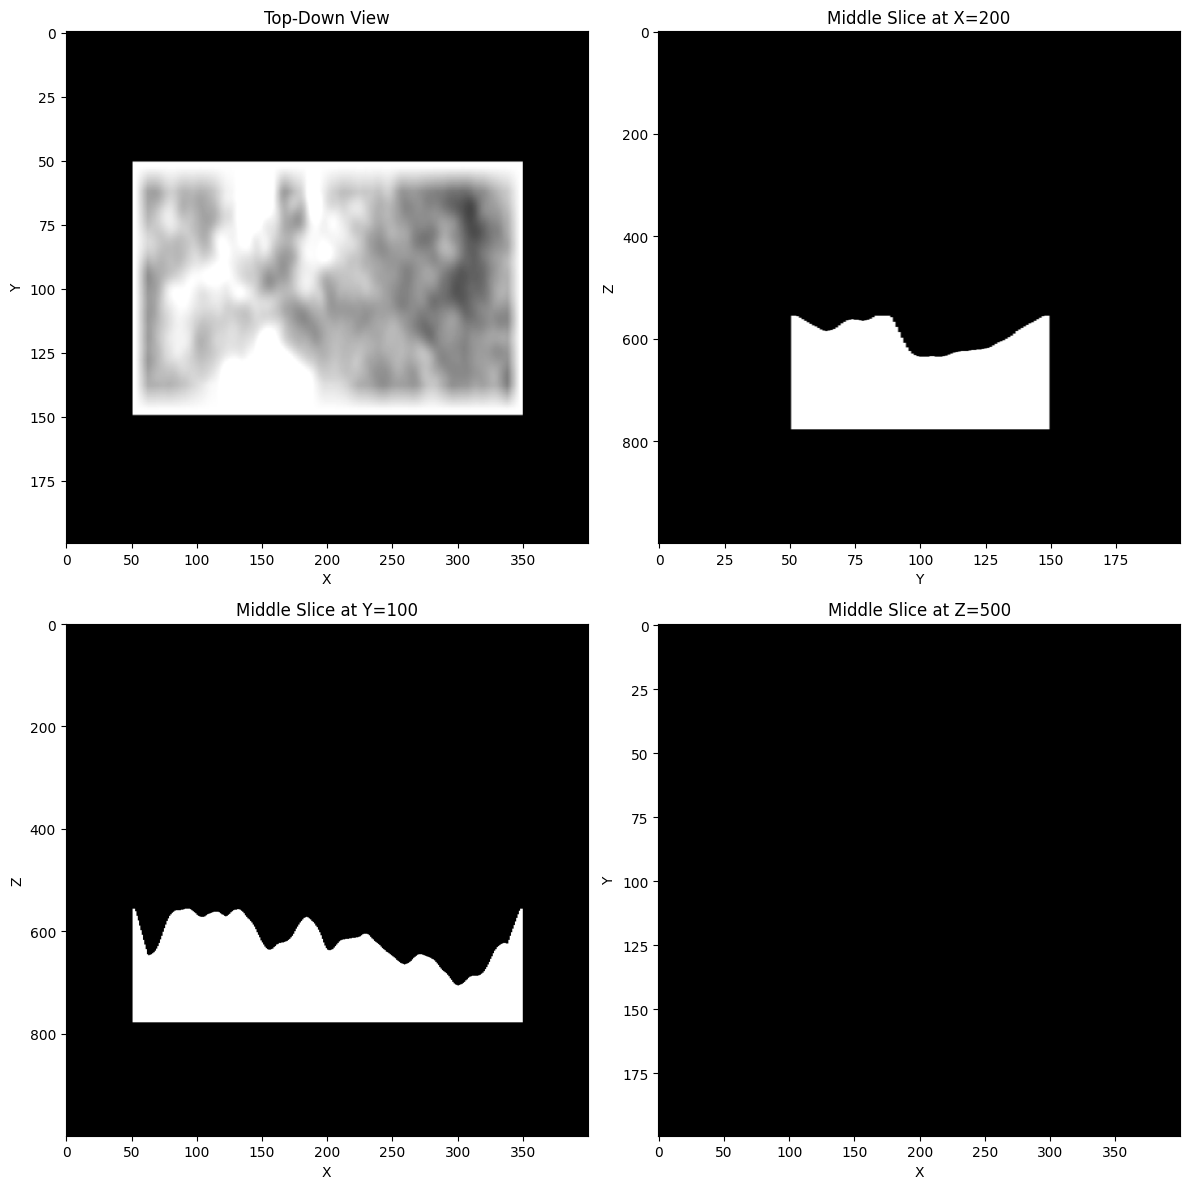

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of your model
NX, NY, NZ = 400,200,1000  # Adjust these values to match your C code

# Function to read the binary .dat file
def read_model(filename):
    with open(filename, "rb") as file:
        data = np.fromfile(file, dtype=np.uint8)
    return data.reshape((NZ, NY, NX))

# Load the model
model = read_model("model.dat")

# Get a top-down view by summing or averaging along the depth (z-axis)
top_view = np.sum(model, axis=0)  # This collapses the Z dimension by summing

# Get middle slices along each dimension
mid_x_slice = model[:, :, NX // 2]
mid_y_slice = model[:, NY // 2, :]
mid_z_slice = model[NZ // 2, :, :]

# Plot all views
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Top-down view
axes[0, 0].imshow(top_view, cmap='gray', aspect='auto')
axes[0, 0].set_title('Top-Down View')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')

# Middle slice along the x-axis
axes[0, 1].imshow(mid_x_slice, cmap='gray', aspect='auto')
axes[0, 1].set_title(f'Middle Slice at X={NX // 2}')
axes[0, 1].set_xlabel('Y')
axes[0, 1].set_ylabel('Z')

# Middle slice along the y-axis
axes[1, 0].imshow(mid_y_slice, cmap='gray', aspect='auto')
axes[1, 0].set_title(f'Middle Slice at Y={NY // 2}')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Z')

# Middle slice along the z-axis
axes[1, 1].imshow(mid_z_slice, cmap='gray', aspect='auto')
axes[1, 1].set_title(f'Middle Slice at Z={NZ // 2}')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('Y')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
# Print some basic statistics
print("Model summary:")

# Total number of elements
total_elements = NX * NY * NZ
print(f"Total elements in the model: {total_elements}")

# Count of 1s and 0s
num_in_model = np.sum(model == 1)
num_not_in_model = np.sum(model == 0)
print(f"Number of 1s (in model): {num_in_model}")
print(f"Number of 0s (not in model): {num_not_in_model}")

# Percentage of 1s and 0s
print(f"Percentage of 1s: {100 * num_in_model / total_elements:.2f}%")
print(f"Percentage of 0s: {100 * num_not_in_model / total_elements:.2f}%")

# Min, max, and mean of the model
print(f"Minimum value in model: {np.min(model)}")
print(f"Maximum value in model: {np.max(model)}")
print(f"Mean value in model: {np.mean(model)}")

Model summary:
Total elements in the model: 8000000
Number of 1s (in model): 651222
Number of 0s (not in model): 7348778
Percentage of 1s: 8.14%
Percentage of 0s: 91.86%
Minimum value in model: 0
Maximum value in model: 1
Mean value in model: 0.08140275


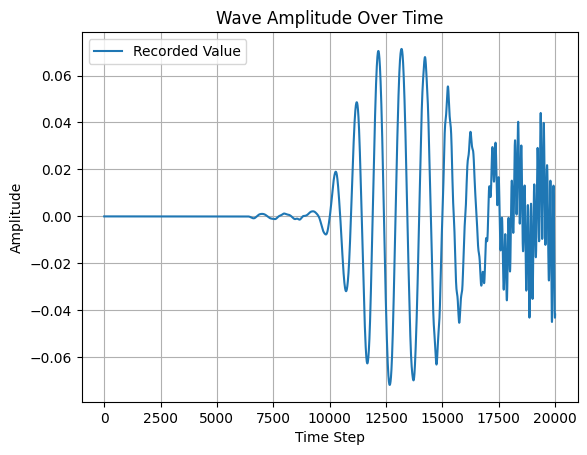

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load binary data
filename = "receiver.dat"
data = np.fromfile(filename, dtype=np.float64)  # Assuming double precision

# Plot the data
plt.plot(data, label="Recorded Value")
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.title("Wave Amplitude Over Time")
plt.legend()
plt.grid()
plt.show()
